In [5]:
#Import libraries
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline 
import matplotlib.pyplot as plt


In [6]:
def show_image(img):
    cv2.imshow('Image' , img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

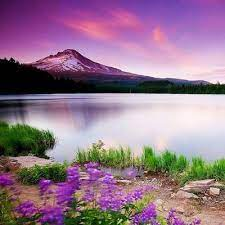

In [7]:
#Load the Image
img = cv2.imread(r'img.png')
#display image
cv2_imshow(img)

In [8]:
def dodgeV2(image, mask):
    return cv2.divide(image, 255-mask, scale=256)

In [9]:
def blend(front,back):
    result=front*255/(255-back)  
    result[result>255]=255 
    result[back==255]=255 
    return result

In [10]:
def render(img_rgb):
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        
    #Applying gaussian blur to grayscale image
    img_blur = cv2.GaussianBlur(img_gray, (21,21), 0, 0)
    
    #Invert the blur image
    inverted_img = 255 - img_blur
    
    #Apply the dodgeV2 function
    img_blend = dodgeV2(img_gray,inverted_img)
    
    #Blend the image
    img_final = 1-blend(img_blend,img_gray)

    return img_final

In [14]:
final_image = render(img)


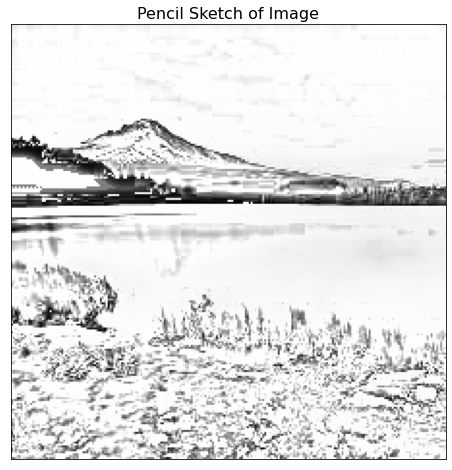

In [16]:
#Display the required output
plt.figure(figsize=(8,8))
plt.imshow(final_image, cmap="gray")
plt.title('Pencil Sketch of Image', fontsize=16)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()